In [51]:
import sys
import os
sys.path.append('..')

In [52]:
from workspace import nometools as nome

In [53]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pickle
import scipy
from scipy import stats

import threading
import multiprocessing 

In [67]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'downstream/full_w200/'
steric_path = main_path + 'downstream/steric_clash/'

In [68]:
np.random.seed(1234)

#### Promoter annotation and sorting

In [69]:
## Getting promoters from refGene

# infile = data_path + 'refGene'
# outfile = data_path + 'refGene.promoters.bed'
# nome.get_promoters_refGene(infile, outfile)

In [70]:
outfile = data_path + 'refGene.promoters.bed'
print('no of promoters :', nome.get_num_reads(outfile))

no of promoters : 32386


In [71]:
## sorting bed files promoter

# infile = data_path + 'refGene.promoters.bed'
# outfile = data_path + 'refGene.promoters.sorted.bed'

# nome.sort_bed(infile, outfile)

#### GCH filtering and intersection

In [72]:
## Filtering GCH file
## Filtering for reads with coverage >= 3

# infile = data_path + 'cpg.raw.sort.GCH.bed'
# outfile = data_path + 'GCH.filtered.bed'

# nome.filter_bed_files(infile, outfile)

In [73]:
# infile = data_path + 'cpg.raw.sort.GCH.bed'
# outfile = data_path + 'GCH.filtered.bed'
# ni = nome.get_num_reads(infile)
# no = nome.get_num_reads(outfile)
# print('no of reads in GCH file :', ni)
# print('no of reads in filtered GCH file :', no)
# print('percentage of reads remaining {}%'.format(round(no*100/ni, 2)))

In [74]:
## sorting bed files GCH

# infile = data_path + 'GCH.filtered.bed'
# outfile = data_path + 'GCH.filtered.sorted.bed'

# nome.sort_bed(infile, outfile)

In [75]:
# # GCH intersect with promoter

# promoters_sorted = data_path + 'refGene.promoters.sorted.bed'
# gch_sorted = data_path + 'GCH.filtered.sorted.bed'
# outfile = data_path + 'GCH.promoter.intersect.bed'

# nome.intersect_bed(promoters_sorted, gch_sorted, outfile)

In [76]:
outfile = data_path + 'GCH.promoter.intersect.bed'
print('no of reads in promoter region :', nome.get_num_reads(outfile))

no of reads in promoter region : 2903756


In [77]:
outfile = data_path + 'refGene.promoters.sorted.bed'
print('no of promoters :', nome.get_num_reads(outfile))

no of promoters : 32386


In [78]:
infile = data_path + 'GCH.promoter.intersect.bed'
_, df = nome.get_promoter_methylation(infile)

In [79]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001005277-621034,NM_001005277,OR4F16,chr1,621034,624034,621095,622034,-,622849,622850,1184,-816,33.33,3
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857344,857345,42,-1958,66.67,3
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857350,857351,48,-1952,20.00,5
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857351,857352,49,-1951,66.67,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857391,857392,89,-1911,50.00,4


In [80]:
df.shape

(2894593, 15)

In [81]:
print('no of promoters : ', df['trans_id'].unique().shape)

no of promoters :  (31783,)


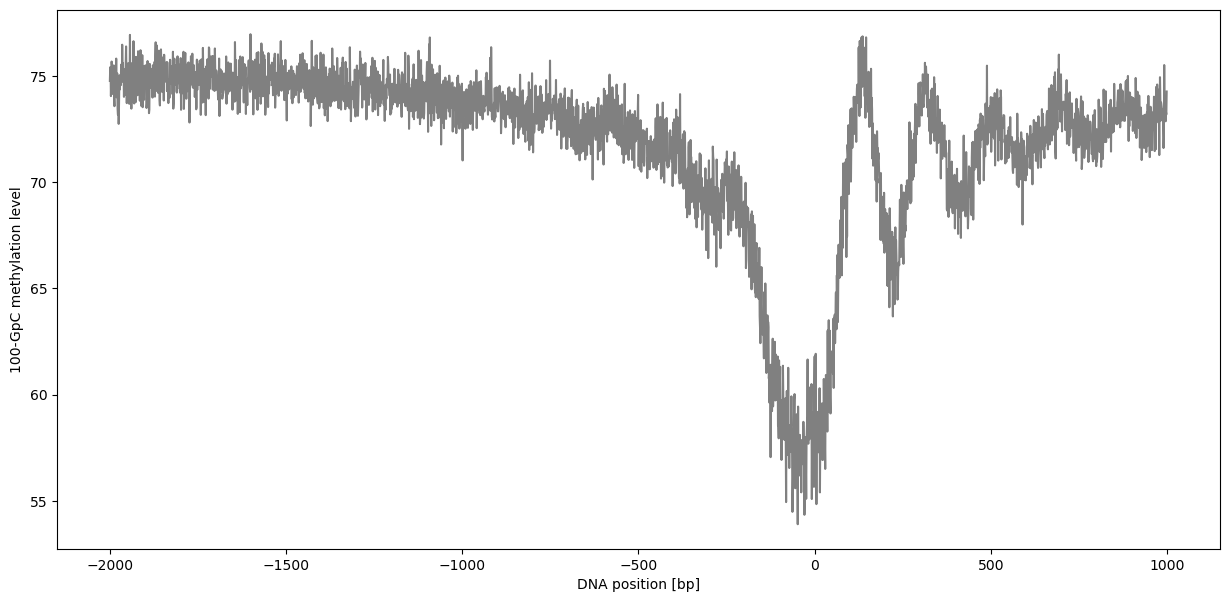

In [82]:
nome.plot_avg_methylation_levels(df, 'GCH')

#### HCG filtering and intersection

In [83]:
## Filtering HCG file
## Filtering for reads with coverage >= 3

# infile = data_path + 'cpg.raw.sort.HCG.bed'
# outfile = data_path + 'HCG.filtered.bed'

# nome.filter_bed_files(infile, outfile)

In [84]:
# infile = data_path + 'cpg.raw.sort.HCG.bed'
# outfile = data_path + 'HCG.filtered.bed'
# ni = nome.get_num_reads(infile)
# no = nome.get_num_reads(outfile)
# print('no of reads in HCG file :', ni)
# print('no of reads in filtered HCG file :', no)
# print('percentage of reads remaining {}%'.format(round(no*100/ni, 2)))

In [85]:
## sorting bed files HCG

# infile = data_path + 'HCG.filtered.bed'
# outfile = data_path + 'HCG.filtered.sorted.bed'

# nome.sort_bed(infile, outfile)

In [86]:
# # HCG intersect with promoter

# promoters_sorted = data_path + 'refGene.promoters.sorted.bed'
# hcg_sorted = data_path + 'HCG.filtered.sorted.bed'
# outfile = data_path + 'HCG.promoter.intersect.bed'

# nome.intersect_bed(promoters_sorted, hcg_sorted, outfile)

In [87]:
infile = data_path + 'HCG.promoter.intersect.bed'
_, df = nome.get_promoter_methylation(infile)

In [88]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857395,857396,93,-1907,0.00,5
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857396,857397,94,-1906,75.00,4
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857943,857944,641,-1359,100.00,3
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857994,857995,692,-1308,33.33,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,858087,858088,785,-1215,33.33,3


In [89]:
df.shape

(876271, 15)

In [90]:
print('no of promoters : ', df['trans_id'].unique().shape)

no of promoters :  (31654,)


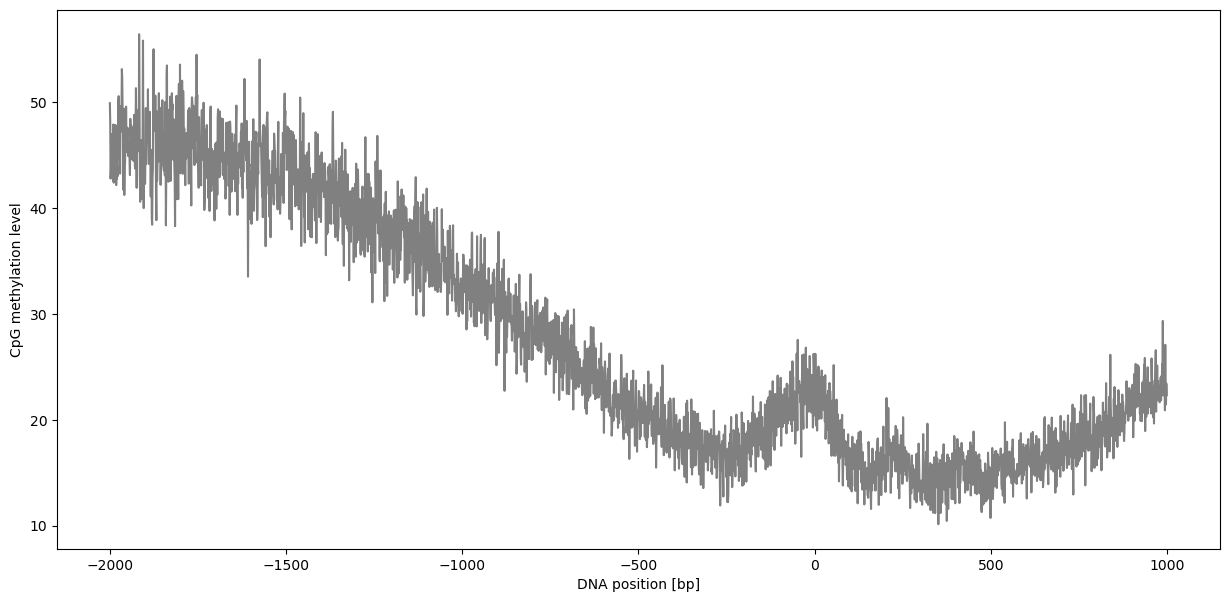

In [91]:
nome.plot_avg_methylation_levels(df, 'HCG')

In [92]:
# df_random = df.copy()
# df_random['meth_rate'] = df_random['meth_rate'].sample(frac=1).reset_index(drop=True)

In [93]:
# outfile = data_path + 'HCG.random.promoter.intersect.bed'
# cols = ['chrom', 'promoter_start', 'promoter_end', 'refid', 'gene_name', 'TSS', 'TES', 'strand', 'chrom', 'meth_start_genome', 'meth_end_genome', 'strand', 'meth_rate', 'coverage']
# df_random[cols].to_csv(outfile, sep='\t', header=False, index=False)

In [94]:
infile = data_path + 'HCG.random.promoter.intersect.bed'
_, df_random = nome.get_promoter_methylation(infile)

In [95]:
df_random.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857395,857396,93,-1907,0.00,5
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857396,857397,94,-1906,33.33,4
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857943,857944,641,-1359,0.00,3
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857994,857995,692,-1308,33.33,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,858087,858088,785,-1215,100.00,3


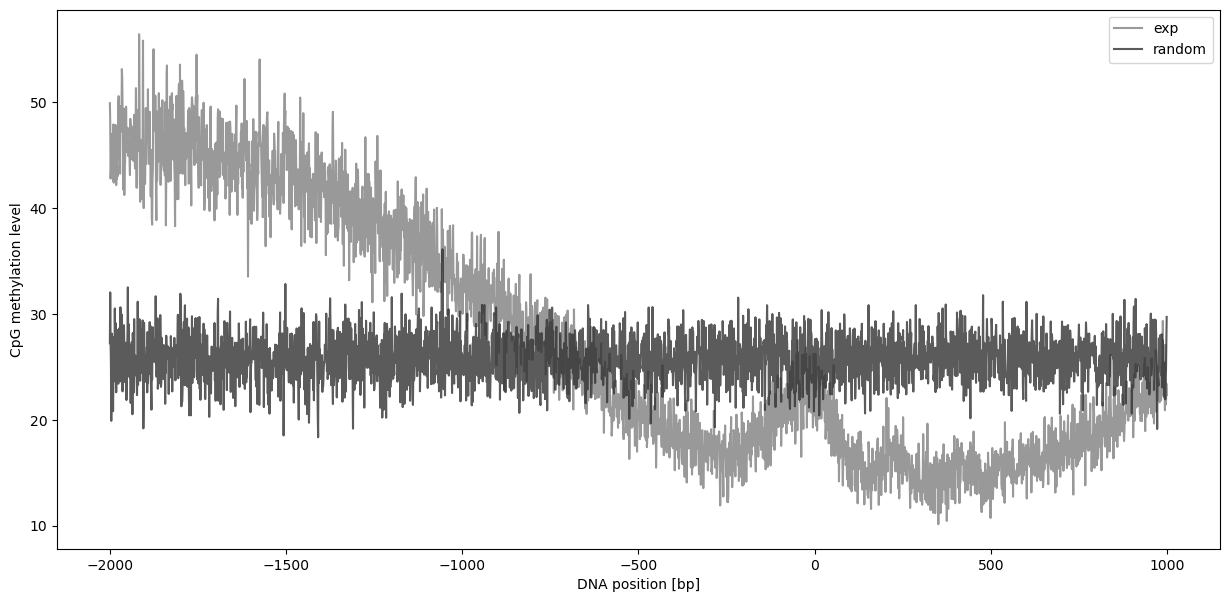

In [96]:
nome.plot_avg_methylation_levels(df, 'HCG', label='exp')
nome.plot_avg_methylation_levels(df_random, 'HCG', fig=False, c='#333232', label='random')

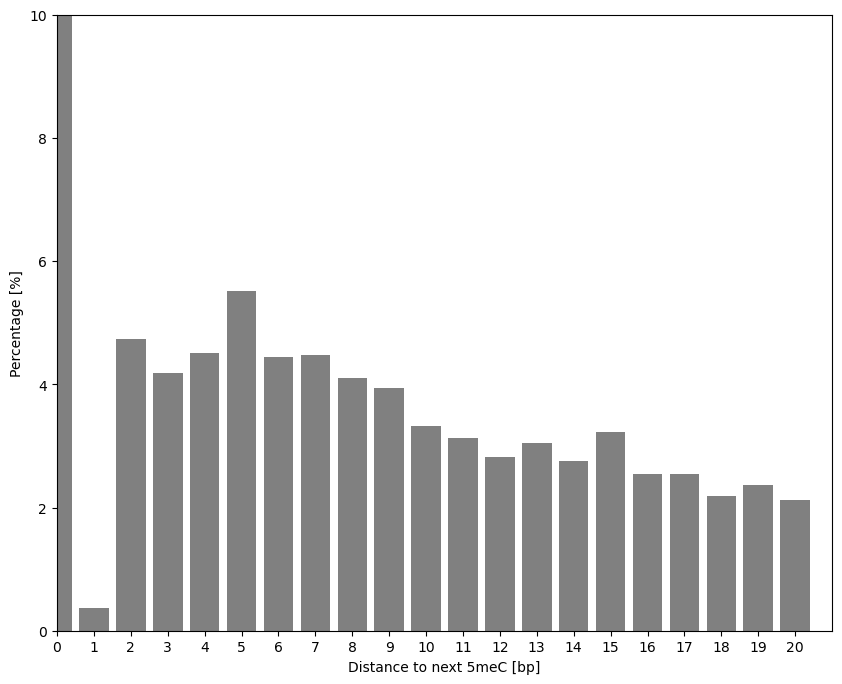

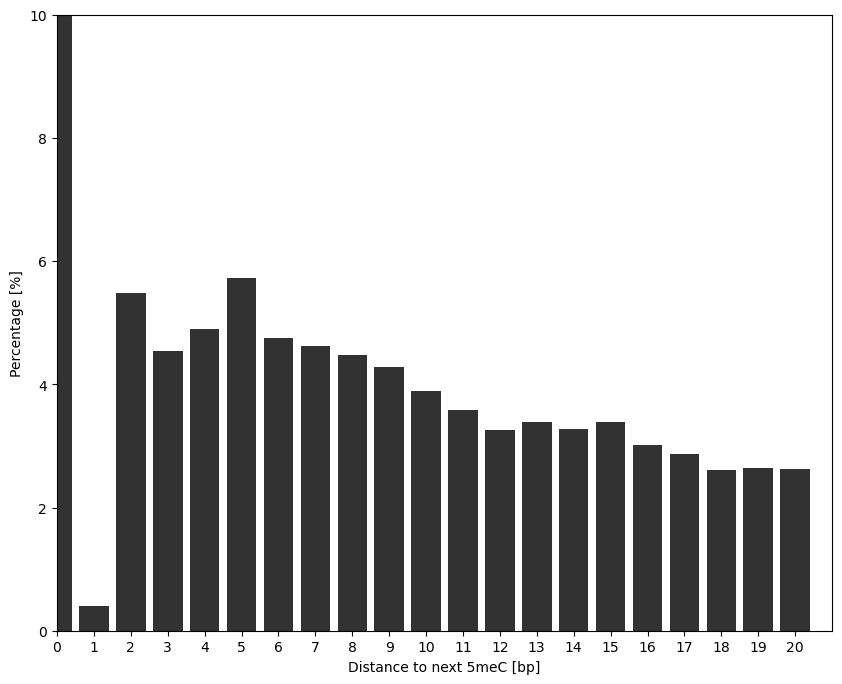

In [97]:
nome.plot_CpG_CpG_dist(df)
nome.plot_CpG_CpG_dist(df_random, c='#333232')

#### NDR (LNDR) regions GCH

In [ ]:
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# myprocess= []
# win_len = 200
# for chr in chrs:
#     print(f'Run : {chr}')
#     infile = data_path + 'GCH.filtered.sorted.bed'
#     res = nome.filter_by_chr(infile, chrs=[chr], SILENT=True)
#     print(f'no of reads for {chr} : {len(res)}')
#     print(f'{chr} res check -', len(res), res[0], res[-1])

#     myprocess.append(multiprocessing.Process(target=nome.findNDR, args=(res, chr, win_len, True, data_path, )))
#     myprocess[-1].start()

# for p in myprocess:
#     p.join()

Run : chr1
no of reads for chr1 : 8004403
chr1 res check - 8004403 ['chr1', 13026, 13027, '+', 0.0, 3] ['chr1', 249239673, 249239674, '+', 33.33, 3]
Finding NDR windows for chr1 with window len 200Run : chr2

no of reads for chr2 : 12047575
chr2 res check - 12047575 ['chr2', 10664, 10665, '-', 0.0, 3] ['chr2', 243188395, 243188396, '-', 66.67, 3]
Run : chr3
Finding NDR windows for chr2 with window len 200
no of reads for chr3 : 6751678
chr3 res check - 6751678 ['chr3', 60039, 60040, '+', 0.0, 3] ['chr3', 197959844, 197959845, '-', 50.0, 4]
Finding NDR windows for chr3 with window len 200
Run : chr4
no of reads for chr4 : 5921598
chr4 res check - 5921598 ['chr4', 11850, 11851, '+', 33.33, 3] ['chr4', 191043590, 191043591, '-', 0.0, 3]
Run : chr5Finding NDR windows for chr4 with window len 200

no of reads for chr5 : 6011009
chr5 res check - 6011009 ['chr5', 13360, 13361, '-', 75.0, 4] ['chr5', 180904706, 180904707, '+', 16.67, 6]
Finding NDR windows for chr5 with window len 200
Run : ch

In [103]:
# ndr_regions = []
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# for chr in chrs:
#     fpath = os.path.join(data_path, f'temp.NDR.{chr}.bed')
#     with open(fpath, 'r') as fin:
#         for line in fin:
#             ndr_regions.append(line)

In [104]:
'''
    Older Version
'''

# ndr_regions = []
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# for chr in chrs:
#     print(f'Run : {chr}')
#     infile = data_path + 'GCH.filtered.sorted.bed'
#     print('no of reads :', nome.get_num_reads(infile))
#     res = nome.filter_by_chr(infile, chrs=[chr])
#     print(len(res), res[0], res[-1])
#     ndrs = nome.findNDR(res)
#     print(len(ndrs), ndrs[0], ndrs[-1])
#     for reg in ndrs:
#         ndr_regions.append([chr, str(reg[0]), str(reg[1])])

'\n    Older Version\n'

In [105]:
# len(ndr_regions), ndr_regions[0], ndr_regions[-1]

(98501, 'chr1\t564996\t565336\n', 'chrY\t59025641\t59025921\n')

In [106]:
# outfile = data_path + 'NDR.bed'
# with open(outfile, 'w') as fout:
#     for reg in ndr_regions:
#         fout.write(reg)

In [107]:
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# for chr in chrs:
#     fpath = os.path.join(data_path, f'temp.NDR.{chr}.bed')
#     os.remove(fpath)

In [108]:
# print('no of ndrs ', len(ndr_regions))

no of ndrs  98501


In [109]:
# nome.sort_bed(data_path + 'NDR.bed', data_path + 'NDR.bed')

In [110]:
# promoters_sorted = data_path + 'refGene.promoters.sorted.bed'
# ndrfile = data_path + 'NDR.bed'
# outfile = data_path + 'NDR.promoter.intersect.bed'
# nome.intersect_bed(promoters_sorted, ndrfile, outfile)

In [111]:
infile = data_path + 'NDR.promoter.intersect.bed'
df = nome.get_nuc_positions(infile)

In [112]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,2553,2953,553,953,400
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,954676,955036,1177,1537,-823,-463,360
2,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955736,956036,2237,2537,237,537,300
3,NM_001363525-1050469,NM_001363525,C1orf159,chr1,1050469,1053469,1017202,1051469,-,1051496,1051936,1533,1973,-467,-27,440
4,NM_152228-1264659,NM_152228,TAS1R3,chr1,1264659,1267659,1266659,1270694,+,1265076,1265356,417,697,-1583,-1303,280


In [113]:
df_filtered = df.copy()

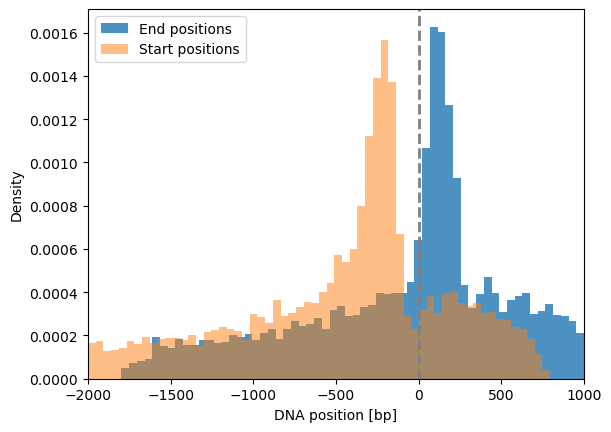

In [114]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_filtered['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(df_filtered['nuc_start_promo_rel'], bins = 60, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

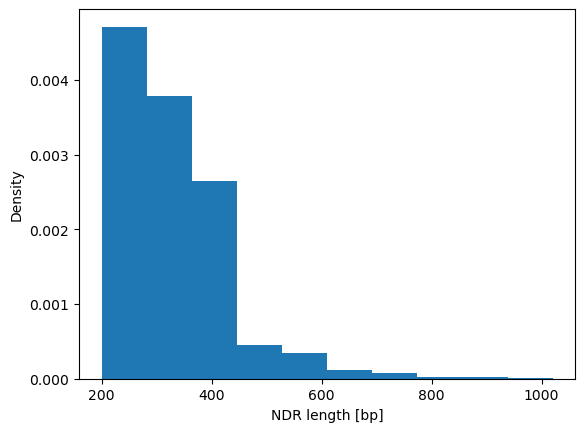

In [115]:
plt.figure()

plt.hist(df_filtered['region_length'], bins=10, histtype='bar', density=True)  

plt.xlabel("NDR length [bp]")
plt.ylabel("Density")
plt.show()

#### NOR (HNDR) Regions GCH

In [116]:
# infile = data_path + 'NDR.bed'
# sizes = data_path + 'hg19.chrom.sizes'
# outfile = data_path + 'NOR.bed'
# nome.complement_bed(infile, sizes, outfile)

In [117]:
# promoters_sorted = data_path + 'refGene.promoters.sorted.bed'
# ndrfile = data_path + 'NOR.bed'
# outfile = data_path + 'NOR.promoter.intersect.bed'
# nome.intersect_bed(promoters_sorted, ndrfile, outfile)

In [118]:
infile = data_path + 'NOR.promoter.intersect.bed'
df = nome.get_nuc_positions(infile)

In [119]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,1537,2237,-463,237,700
1,NM_152228-1264659,NM_152228,TAS1R3,chr1,1264659,1267659,1266659,1270694,+,1265356,1267316,697,2657,-1303,657,1960
2,NM_001282583-1296179,NM_001282583,MXRA8,chr1,1296179,1299179,1288070,1297179,-,1297716,1298456,723,1463,-1277,-537,740
3,NM_178545-1849718,NM_178545,TMEM52,chr1,1849718,1852718,1849029,1850718,-,1849856,1851296,1422,2862,-578,862,1440
4,NM_178545-1849718,NM_178545,TMEM52,chr1,1849718,1852718,1849029,1850718,-,1851536,1852536,182,1182,-1818,-818,1000


In [120]:
df_filtered = df[df['region_length'] > 147].copy()
# df_filtered = df.copy()

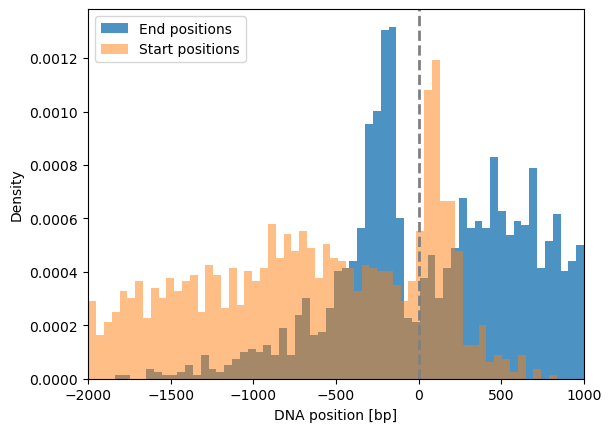

In [121]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_filtered['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(df_filtered['nuc_start_promo_rel'], bins = 60, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

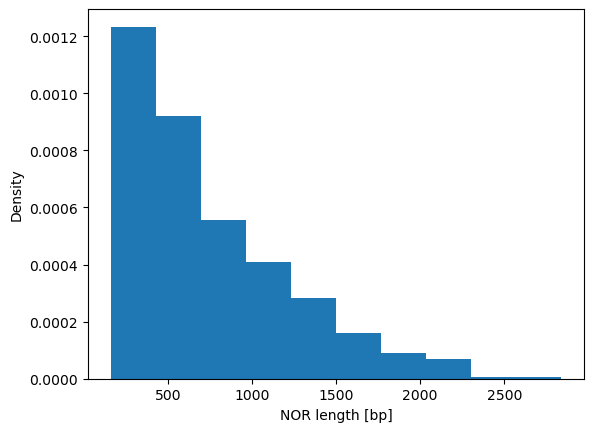

In [122]:
plt.figure()

plt.hist(df_filtered['region_length'], bins=10, histtype='bar', density=True)  

plt.xlabel("NOR length [bp]")
plt.ylabel("Density")
plt.show()

#### Steric Clash and x_clash dict creation

max_clash 65.72379367720465
min_clash 0.0


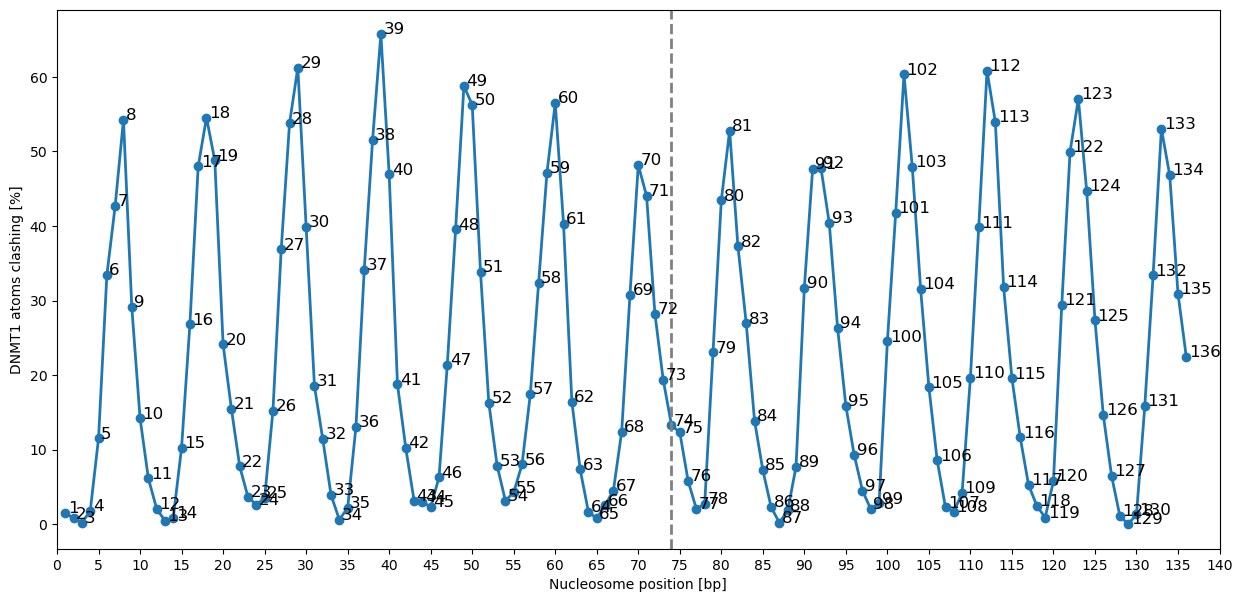

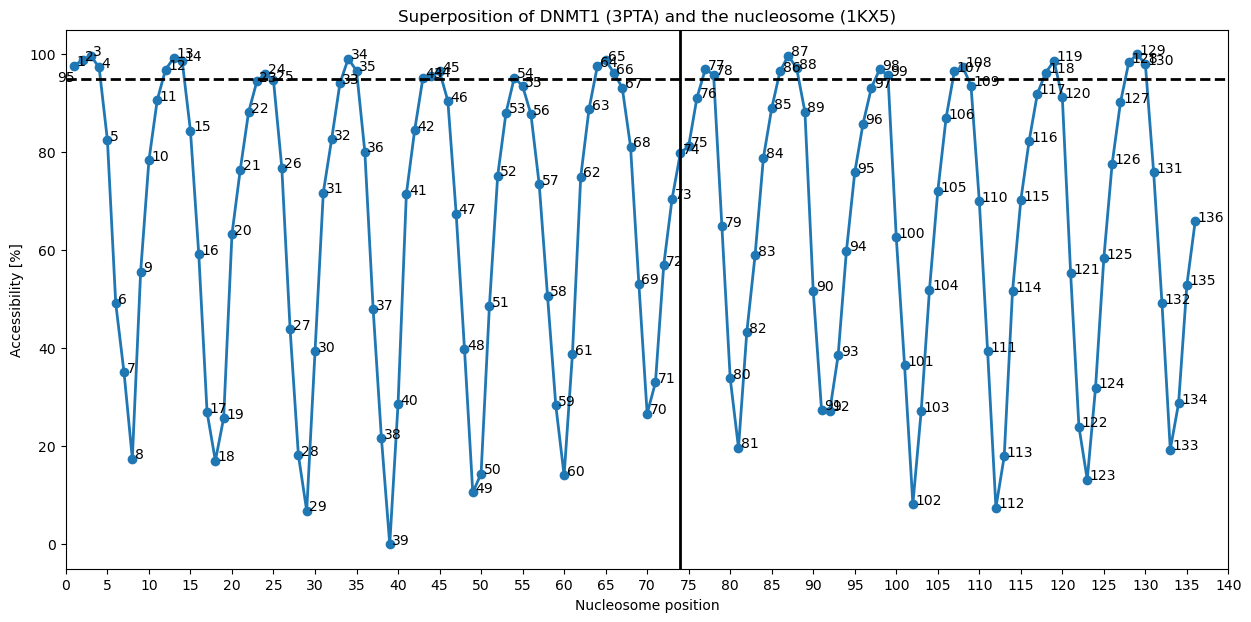

In [123]:
clash_dict_loc = steric_path + 'clash_dict'
info_dict_loc = steric_path + 'info_nbr_dict'
nome.plot_nbr_clashs(steric_path, clash_dict_loc, info_dict_loc)

#### HCG and Random HCG onto NDRs/NORs

In [124]:
# promo_NDR_file = data_path + 'NDR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.promoter.intersect.bed'
# outfile = data_path + 'promoter.NDR.HCG.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [125]:
# promo_NDR_file = data_path + 'NDR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.random.promoter.intersect.bed'
# outfile = data_path + 'promoter.NDR.HCG.random.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [126]:
# promo_NDR_file = data_path + 'NOR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.promoter.intersect.bed'
# outfile = data_path + 'promoter.NOR.HCG.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [127]:
# promo_NDR_file = data_path + 'NOR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.random.promoter.intersect.bed'
# outfile = data_path + 'promoter.NOR.HCG.random.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

#### Sliding Window Approach

In [128]:
def normalize_clash_dict(x_y_clash_dict):
    min_clash = min(x_y_clash_dict.values())
    max_clash = max(x_y_clash_dict.values())

    x_y_clash_dict_norm = {k: (float(v-min_clash)/float(max_clash-min_clash))*100 for k, v in x_y_clash_dict.items()}
    return x_y_clash_dict_norm

In [129]:
infile = steric_path + 'x_y_dict'
with open(infile, 'rb') as fin:
    x_y_clash_dict = pickle.load(fin)

x_y_clash_dict_norm = normalize_clash_dict(x_y_clash_dict)

meth_thres_range = [0, 10, 20]
clash_thres_range = [5, 10, 20, 50]

params = []
for clash_thres in clash_thres_range:
    for meth_thres in meth_thres_range:
        k = "c" + str(clash_thres) + "m" + str(meth_thres)
        params.append(k)

In [130]:
def make_sliding_windows_file(df_promo_nuc_WGBS, x_y_clash_dict_norm):
    column_names = ["trans_id", "refid", "NOR_nbr", "window_nbr", "nbr_meth_CpGs", "nuc_region_length", "meth_rates_window"] 
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
        
    all_nuc_pos = x_y_clash_dict_norm.keys()
    nbr_bases_nuc = len(all_nuc_pos)
    
    all_trans_ids = list(set(list(df_promo_nuc_WGBS["trans_id"])))
    
    c = 0
    for trans_id in all_trans_ids:
        refid = trans_id.split("-")[0]
        c += 1
        
        df_WGBS_tmp = df_promo_nuc_WGBS.loc[df_promo_nuc_WGBS["trans_id"] == trans_id]
        
        NOR_number = 1
        nuc_region_starts = list(set(list(df_WGBS_tmp["nuc_region_start_genome"])))
        for NOR_start in nuc_region_starts:
            df_NOR_tmp = df_WGBS_tmp.loc[df_WGBS_tmp["nuc_region_start_genome"] == NOR_start]
            
            start = NOR_start
            win_nbr = 1
                    
            list_meth_positions = list(df_NOR_tmp["meth_start_genome"])
            list_meth_rates = list(df_NOR_tmp["meth_rate"])
            meth_dict_promoter = dict(zip(list_meth_positions, list_meth_rates))
    
            NOR_end = list(df_NOR_tmp["nuc_region_end_genome"])[0]
            
            while start + nbr_bases_nuc - 1 <= NOR_end:
                #get relative and absolute position+methylation
                window_start = start
                window_end = window_start+nbr_bases_nuc-1
                
                meth_in_window_tmp = dict()
                for meth_start_genome in meth_dict_promoter.keys():
                    if (window_start <= meth_start_genome) & (meth_start_genome <= window_end):
                        rel_pos = meth_start_genome-window_start+1
                        
                        meth_rate = meth_dict_promoter[meth_start_genome]
                        meth_in_window_tmp[rel_pos] = meth_rate
                
                if len(meth_in_window_tmp) != 0:
                    #exp
                    info_dict["trans_id"].append(trans_id)
                    info_dict["refid"].append(refid)
                    info_dict["NOR_nbr"].append(NOR_number)
                    info_dict["window_nbr"].append(win_nbr)
                    info_dict["nbr_meth_CpGs"].append(len(meth_in_window_tmp.keys()))
                    info_dict["nuc_region_length"].append(np.abs(NOR_end-NOR_start)+1)
                    info_dict["meth_rates_window"].append(meth_in_window_tmp)
                
                start += 1
                win_nbr += 1
        
            NOR_number += 1
                
                
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["trans_id"])),columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]

    return df

In [131]:
def calc_perc_exp_clash_ident(x_y_clash_dict_norm, meth_in_window_tmp, meth_thres, clash_thres):    
    count_ident = 0
    cpg_positions = meth_in_window_tmp.keys()
    for meth_pos in cpg_positions:
        meth_rate = meth_in_window_tmp[meth_pos]
        clash_perc = x_y_clash_dict[meth_pos] 
        
        if meth_rate > meth_thres:
            if clash_perc <= clash_thres:
                count_ident += 1
        else:
            if clash_perc > clash_thres:
                count_ident += 1
                
    nbr_cpgs = len(cpg_positions)
    perc_exp_clash_ident = float(count_ident)/float(nbr_cpgs)
    
    return perc_exp_clash_ident

In [132]:
import re

def calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params):
    column_names = ["refid_NOR", "trans_id", "refid", "NOR_nbr", "window_nbr", "nbr_CpGs", "nuc_region_length"] + params
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
        
    all_refids = list(df_sliding_windows["refid"])
    all_NOR_nbrs = list(df_sliding_windows["NOR_nbr"])
    refid_NORs = []
    for ref, nor in zip(all_refids, all_NOR_nbrs):
        refid_NORs.append(str(ref)+"-"+str(nor))
    
    info_dict["refid_NOR"].extend(refid_NORs)
    info_dict["trans_id"].extend(list(df_sliding_windows["trans_id"]))
    info_dict["refid"].extend(all_refids)
    info_dict["NOR_nbr"].extend(all_NOR_nbrs)
    info_dict["window_nbr"].extend( list(df_sliding_windows["window_nbr"]))
    info_dict["nbr_CpGs"].extend(list(df_sliding_windows["nbr_meth_CpGs"])  )
    info_dict["nuc_region_length"].extend(list(df_sliding_windows["nuc_region_length"]))

    all_scores =  list(df_sliding_windows["meth_rates_window"]) #{34: 0.0, 35: 0.0,...}
    c = 0
    for row_df in range(len(all_scores)):
        c += 1
        
        # meth_rates_window = ast.literal_eval(all_scores[row_df])
        meth_rates_window = all_scores[row_df]
    
        for param_str in params:
            clash_thres = float(re.findall(r'\d+', param_str)[0]) #c5m0
            meth_thres = float(re.findall(r'\d+', param_str)[1])
            
            perc_clash_ident = calc_perc_exp_clash_ident(x_y_clash_dict_norm, meth_rates_window, meth_thres, clash_thres)
            info_dict[param_str].append(perc_clash_ident)
            
    #Built dataframe 
    df_scores = pd.DataFrame(0, index = np.arange(len(info_dict[column_names[0]])),columns = column_names)
    for feat in column_names:
        df_scores[feat] = info_dict[feat]

    return df_scores

In [133]:
def calculate_cohens_d(list_EXP,list_RAND):
    mEXP = np.mean(list_EXP)
    sdEXP = np.std(list_EXP)
    
    mRAND = np.mean(list_RAND)
    sdRAND = np.std(list_RAND)
    
    denom = np.sqrt(float(sdEXP**2 + sdRAND**2)/2.0)
    cohens_d = float(mEXP-mRAND)/float(denom)
    
    return cohens_d

def make_df_p_vals_cohens_d(df_scores_EXP, df_scores_RAND, params):
    column_names = ["nbr_CpGs", "parameter", "N_EXP", "N_RAND", "mean_EXP", "median_EXP", "std_EXP", "mean_RAND",
                    "median_RAND", "std_RAND", "cohens_d", "is_normal_EXP", "is_normal_RAND", "pval_ttest",
                    "t_stat", "pval_ranksums", "pval_ks_2samp"]
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []

    nbr_CpGs_list = list(set(list(df_scores_EXP["nbr_CpGs"])))

    for nbr_CpGs in nbr_CpGs_list:
        df_scores_EXP_tmp = df_scores_EXP.loc[df_scores_EXP["nbr_CpGs"] == nbr_CpGs]
        df_scores_RAND_tmp = df_scores_RAND.loc[df_scores_RAND["nbr_CpGs"] == nbr_CpGs]
                    
        for p in range(len(params)):
            par_name = params[p]
            EXP_scores = list(df_scores_EXP_tmp[par_name])
            RAND_scores = list(df_scores_RAND_tmp[par_name])
            
            info_dict["nbr_CpGs"].append(nbr_CpGs)
            info_dict["parameter"].append(par_name)
            
            info_dict["N_EXP"].append(len(EXP_scores))
            info_dict["N_RAND"].append(len(RAND_scores))
            
            info_dict["mean_EXP"].append(np.mean(EXP_scores))
            info_dict["median_EXP"].append(np.median(EXP_scores))
            info_dict["std_EXP"].append(np.std(EXP_scores))
            
            info_dict["mean_RAND"].append(np.mean(RAND_scores))
            info_dict["median_RAND"].append(np.median(RAND_scores))
            info_dict["std_RAND"].append(np.std(RAND_scores))
            
            #EFFECT SIZE
            cohens_d = calculate_cohens_d(EXP_scores, RAND_scores)
            info_dict["cohens_d"].append(cohens_d)
            
            #STAT TESTS
            #is normal distributed? This function tests the null hypothesis that a sample comes from a normal distribution. If small -> ost likely not normal dustributed
            pval_normal_EXP = stats.normaltest(EXP_scores)[1] if len(EXP_scores) >= 8 else -1
            pval_normal_RAND = stats.normaltest(RAND_scores)[1] if len(EXP_scores) >= 8 else -1
            
            #students t
            ttest_res = stats.ttest_ind(EXP_scores,RAND_scores,equal_var = False)
            t_stat = ttest_res[0]
            p_val_ttest = float(ttest_res[1])/2.0
            
            #ranksums, kstest
            ranksums = scipy.stats.ranksums(EXP_scores,RAND_scores)[1]
            ks_2samp = scipy.stats.ks_2samp(EXP_scores,RAND_scores)[1]
    
            info_dict["is_normal_EXP"].append(pval_normal_EXP)
            info_dict["is_normal_RAND"].append(pval_normal_RAND)
            info_dict["pval_ttest"].append(p_val_ttest)
            info_dict["t_stat"].append(t_stat)
            info_dict["pval_ranksums"].append(ranksums)
            info_dict["pval_ks_2samp"].append(ks_2samp)
            
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["nbr_CpGs"])),columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]

    return df

In [134]:
def plot_nbr_CpGs_cohensd(df_values, params):
    plt.figure(figsize=(15,7))
    ax = plt.subplot(1,1,1)
    
    nbr_CpGs_list = sorted(list(set(list(df_values["nbr_CpGs"]))))

    for par_name in params:
        
        df_values_tmp = df_values.loc[df_values["parameter"] == par_name]
        
        x_nbr_cpg_vals = list(df_values_tmp["nbr_CpGs"])
        y_cohens_d_vals = list(df_values_tmp["cohens_d"])
        
        if "m0" in par_name:
            c = "#117A65"
        if "m10" in par_name:
            c = "#45B39D"
        if "m20" in par_name:
            c = "#EB984E"
        if "c5" in par_name:
            m = "*"
            ms = 15
        if "c10" in par_name:
            m = "^"
            ms = 10
        if "c20" in par_name:
            m = "s"
            ms = 10
        if "c50" in par_name:
            m = "o"
            ms = 10
        
        
        plt.plot(x_nbr_cpg_vals, y_cohens_d_vals, linestyle="-", color=c, marker=m, markersize=ms, label=par_name)
    
    
    plt.axhline(y=0.2, linewidth=1, color = '#2C3E50',linestyle='--')
    plt.axhline(y=0.5, linewidth=1, color = '#2C3E50',linestyle='--')
    plt.axhline(y=0.8, linewidth=1, color = '#2C3E50',linestyle='--')
    
    e = 0.02
    ax.text(-1.8,0.2+e,"Small ES")
    ax.text(-1.8,0.5+e,"Medium ES")
    ax.text(-1.8,0.8+e,"Large ES")

    ax.set_ylabel("Cohen's d")
    ax.set_xlabel("Number of CpGs in sliding window")   

    plt.xlim(-2,35)
    plt.ylim(-3,3)

    legend = ax.legend(loc="lower left",ncol=4,frameon = 1,prop={'size':14})
    legend.get_frame().set_facecolor('white')

In [135]:
def plot_pvals_cohensd(df_values,params):
    
    plt.figure(figsize=(20,7))
    ax = plt.subplot(1,1,1)
    
    nbr_CpGs_list = sorted(list(set(list(df_values["nbr_CpGs"]))))
    
    for par_name in params:
        df_values_tmp = df_values.loc[df_values["parameter"] == par_name]
        
        x_nbr_cpg_vals = list(df_values_tmp["nbr_CpGs"])
        y_pvals_vals = list(df_values_tmp["pval_ranksums"])
        
        y_pvals_log = [-np.log10(p_val) if p_val != 0.0 else 310 for p_val in y_pvals_vals]
        
        if "m0" in par_name:
            c = "#117A65"
        if "m10" in par_name:
            c = "#45B39D"
        if "m20" in par_name:
            c = "#EB984E"
        if "c5" in par_name:
            m = "*"
            ms = 15
        if "c10" in par_name:
            m = "^"
            ms = 10
        if "c20" in par_name:
            m = "s"
            ms = 10
        if "c50" in par_name:
            m = "o"
            ms = 10
        
        
        plt.plot(x_nbr_cpg_vals,y_pvals_log,linestyle="-",color=c,marker=m,markersize=ms,label=par_name)
    
    
    #plt.axhline(y=-np.log10(0.05), linewidth=1, color = '#5D6D7E',linestyle='-')
    #plt.axhline(y=-np.log10(0.01), linewidth=1, color = '#515A5A',linestyle='-')

    ax.set_ylabel("-log10(p-value)")
    ax.set_xlabel("Number of CpGs in sliding window")   

    # plt.xlim(-2,35)
    # plt.ylim(0,450)

    legend = ax.legend(loc="upper right",ncol=4,frameon = 1,prop={'size':14})
    legend.get_frame().set_facecolor('white')

In [136]:
def plot_score_distribution(df_scores_EXP,df_scores_RAND,params):

    fig = plt.figure(figsize=(15,15))
    for idx, p in enumerate(range(len(params))):
        par_name = params[p]
        EXP_scores = list(df_scores_EXP[par_name])
        RAND_scores = list(df_scores_RAND[par_name])
                
        ttest_res = stats.ttest_ind(EXP_scores,RAND_scores,equal_var = False)
        t = ttest_res[0]
        p_val = float(ttest_res[1])/2.0
        
        
        ranksums = scipy.stats.ranksums(EXP_scores,RAND_scores)[1]
        ks_2samp = scipy.stats.ks_2samp(EXP_scores,RAND_scores)[1]

        #EFFECT SIZE
        cohens_d = calculate_cohens_d(EXP_scores,RAND_scores)
        
        #test for normal ditribution
        pval_normal_EXP = stats.normaltest(EXP_scores)[1] if len(EXP_scores) >= 8 else -1   #This function tests the null hypothesis that a sample comes from a normal distribution. If small -> ost likely not normal dustributed
        pval_normal_RAND = stats.normaltest(RAND_scores)[1] if len(EXP_scores) >= 8 else -1
                
        #PLOTTING
        bins = 20    
        
        ax = plt.subplot(4, 3, idx + 1)
        
        c1 = "#5499C7"
        c2 = "#7DCEA0"
        
        ax.annotate(par_name, xy=(0, 1), xycoords='axes fraction', fontsize=10, xytext=(5, -5), textcoords='offset points',ha='left', va='top') #region_name+" - "+

        plt.hist(np.array(EXP_scores), bins=bins, color=c1, label="Experimental", alpha=0.8)
        plt.hist(np.array(RAND_scores), bins=bins, color=c2, label="Random", alpha=0.8)
        
        # legend = ax.legend(loc="upper right",frameon = 1,prop={'size':16})
        # legend.get_frame().set_facecolor('white')
        
        plt.xlim(0,1)
        
        ax.set_xlabel("Matching score")
        ax.set_ylabel("Density")

In [137]:
def plot_hist_distr_CpGs(df_scores):  
    
    nbr_CpG_list = list(df_scores["nbr_CpGs"])
    x = sorted(list(set(nbr_CpG_list)))  
    y = [nbr_CpG_list.count(c) for c in x]  
    
    tot = len(nbr_CpG_list)
    p = 0
    for nbr_cpg,freq in zip(x,y):
        perc = (float(freq)/float(tot))*100
        p += perc
    
    for nbr_cpg_pos in range(len(x)):
        nbr_cpg = x[nbr_cpg_pos]
        freq = sum(y[nbr_cpg_pos:])
        perc = (float(freq)/float(tot))*100
    
    #PLOTTING
    bins = len(set(nbr_CpG_list))   
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    c1 = "#515A5A"
    c2 = "#7DCEA0"
    
    plt.hist(np.array(nbr_CpG_list), bins=bins, color=c1)
    # sns.distplot(np.array(nbr_CpG_list),norm_hist=True,kde=False,bins=bins,color=c1)   # norm_hist : bool, otional If True, the histogram height shows a density rather than a count. This is implied if a KDE or fitted density is plotted.
        
    ax.set_xlabel("Number of CpGs")
    ax.set_ylabel("Density")
    
    xticks = range(0,len(set(nbr_CpG_list)),5)
    plt.xlim(0,len(set(nbr_CpG_list))+1)
    plt.xticks([i+0.2 for i in xticks],xticks)


##### Sliding Window for NDRs

In [138]:
infile = data_path + 'promoter.NDR.HCG.intersect.bed'
df = nome.get_nuc_pos_methylation(infile)

infile = data_path + 'promoter.NDR.HCG.random.intersect.bed'
df_random = nome.get_nuc_pos_methylation(infile)

In [139]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893701,893702,16.67
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893735,893736,25.00
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893757,893758,0.00
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893785,893786,0.00
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893789,893790,0.00


In [140]:
df_random.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893701,893702,100.00
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893735,893736,100.00
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893757,893758,0.00
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893785,893786,33.33
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893789,893790,80.00


In [141]:
df_sliding_windows = make_sliding_windows_file(df, x_y_clash_dict_norm)
df_sliding_windows_random = make_sliding_windows_file(df_random, x_y_clash_dict_norm)

In [142]:
df_sliding_windows.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_001166286-93615385,NM_001166286,1,1,1,221,{48: 0.0}
1,NM_001166286-93615385,NM_001166286,1,2,1,221,{47: 0.0}
2,NM_001166286-93615385,NM_001166286,1,3,1,221,{46: 0.0}
3,NM_001166286-93615385,NM_001166286,1,4,1,221,{45: 0.0}
4,NM_001166286-93615385,NM_001166286,1,5,1,221,{44: 0.0}


In [143]:
df_sliding_windows_random.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_001166286-93615385,NM_001166286,1,1,1,221,{48: 66.67}
1,NM_001166286-93615385,NM_001166286,1,2,1,221,{47: 66.67}
2,NM_001166286-93615385,NM_001166286,1,3,1,221,{46: 66.67}
3,NM_001166286-93615385,NM_001166286,1,4,1,221,{45: 66.67}
4,NM_001166286-93615385,NM_001166286,1,5,1,221,{44: 66.67}


In [144]:
df_score_exp = calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params)
df_score_random = calc_score_lists(df_sliding_windows_random, x_y_clash_dict_norm, params)

In [145]:
df_score_exp.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,1,1,221,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,2,1,221,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,3,1,221,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,4,1,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,5,1,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
df_score_random.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,1,1,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,2,1,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,3,1,221,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,4,1,221,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,NM_001166286-1,NM_001166286-93615385,NM_001166286,1,5,1,221,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [147]:
df_pvalues = make_df_p_vals_cohens_d(df_score_exp, df_score_random, params)

In [148]:
df_pvalues.head()

,nbr_CpGs,parameter,N_EXP,N_RAND,mean_EXP,median_EXP,std_EXP,mean_RAND,median_RAND,std_RAND,cohens_d,is_normal_EXP,is_normal_RAND,pval_ttest,t_stat,pval_ranksums,pval_ks_2samp
0,1,c5m0,324641,324641,0.539581,1.0,0.498431,0.538084,1.0,0.498548,0.003003,0.0,0.0,0.113152,1.209938,0.296175,0.859542
1,1,c5m10,324641,324641,0.540308,1.0,0.498373,0.538315,1.0,0.498530,0.003998,0.0,0.0,0.053603,1.610884,0.164302,0.538685
2,1,c5m20,324641,324641,0.553990,1.0,0.497076,0.550808,1.0,0.497412,0.006399,0.0,0.0,0.004966,2.578180,0.026387,0.074571
3,1,c10m0,324641,324641,0.522060,1.0,0.499513,0.520994,1.0,0.499559,0.002134,0.0,0.0,0.195007,0.859591,0.457035,0.992663
4,1,c10m10,324641,324641,0.522466,1.0,0.499495,0.521139,1.0,0.499553,0.002658,0.0,0.0,0.142133,1.070788,0.354213,0.936809


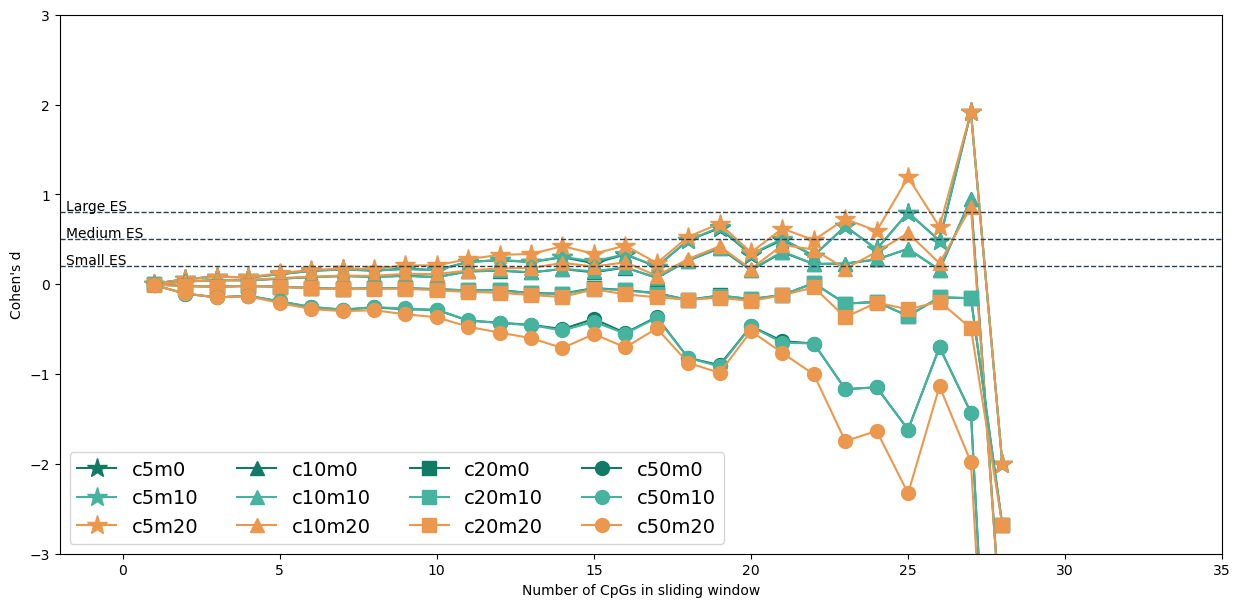

In [149]:
plot_nbr_CpGs_cohensd(df_pvalues, params)

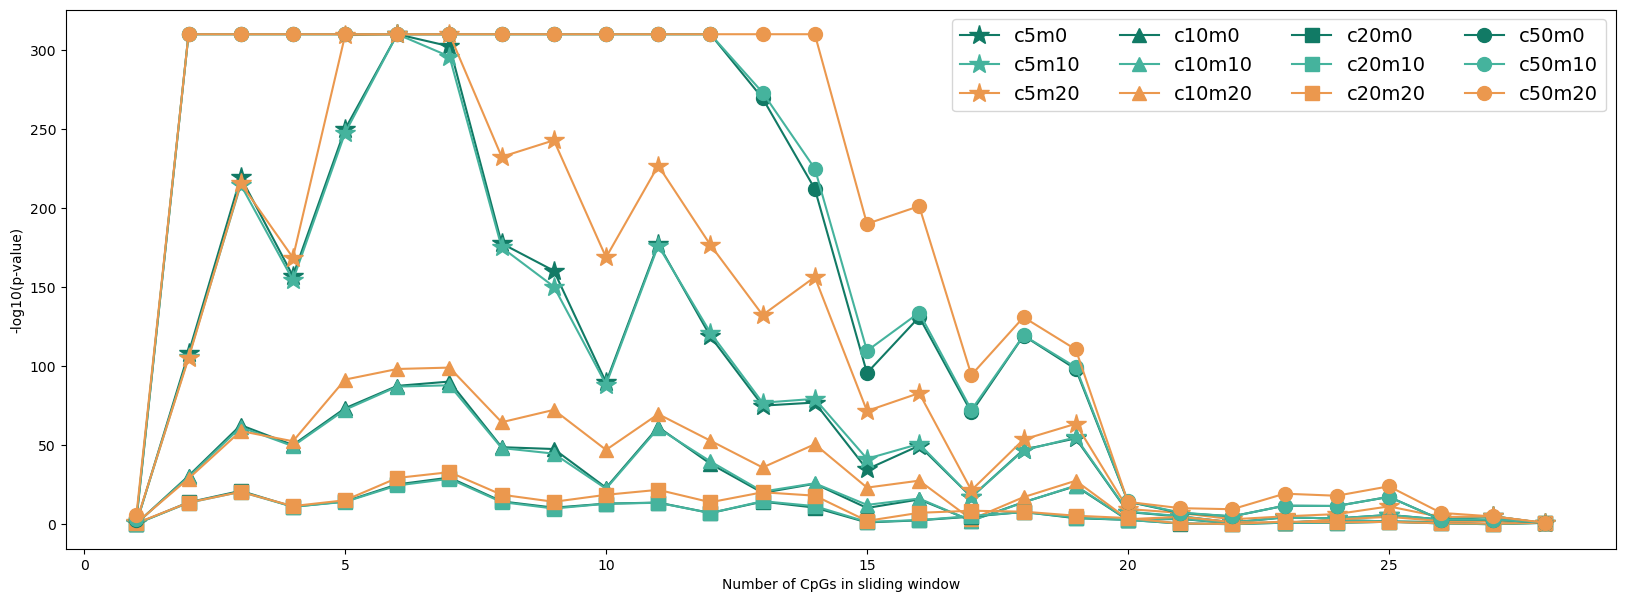

In [150]:
plot_pvals_cohensd(df_pvalues, params)

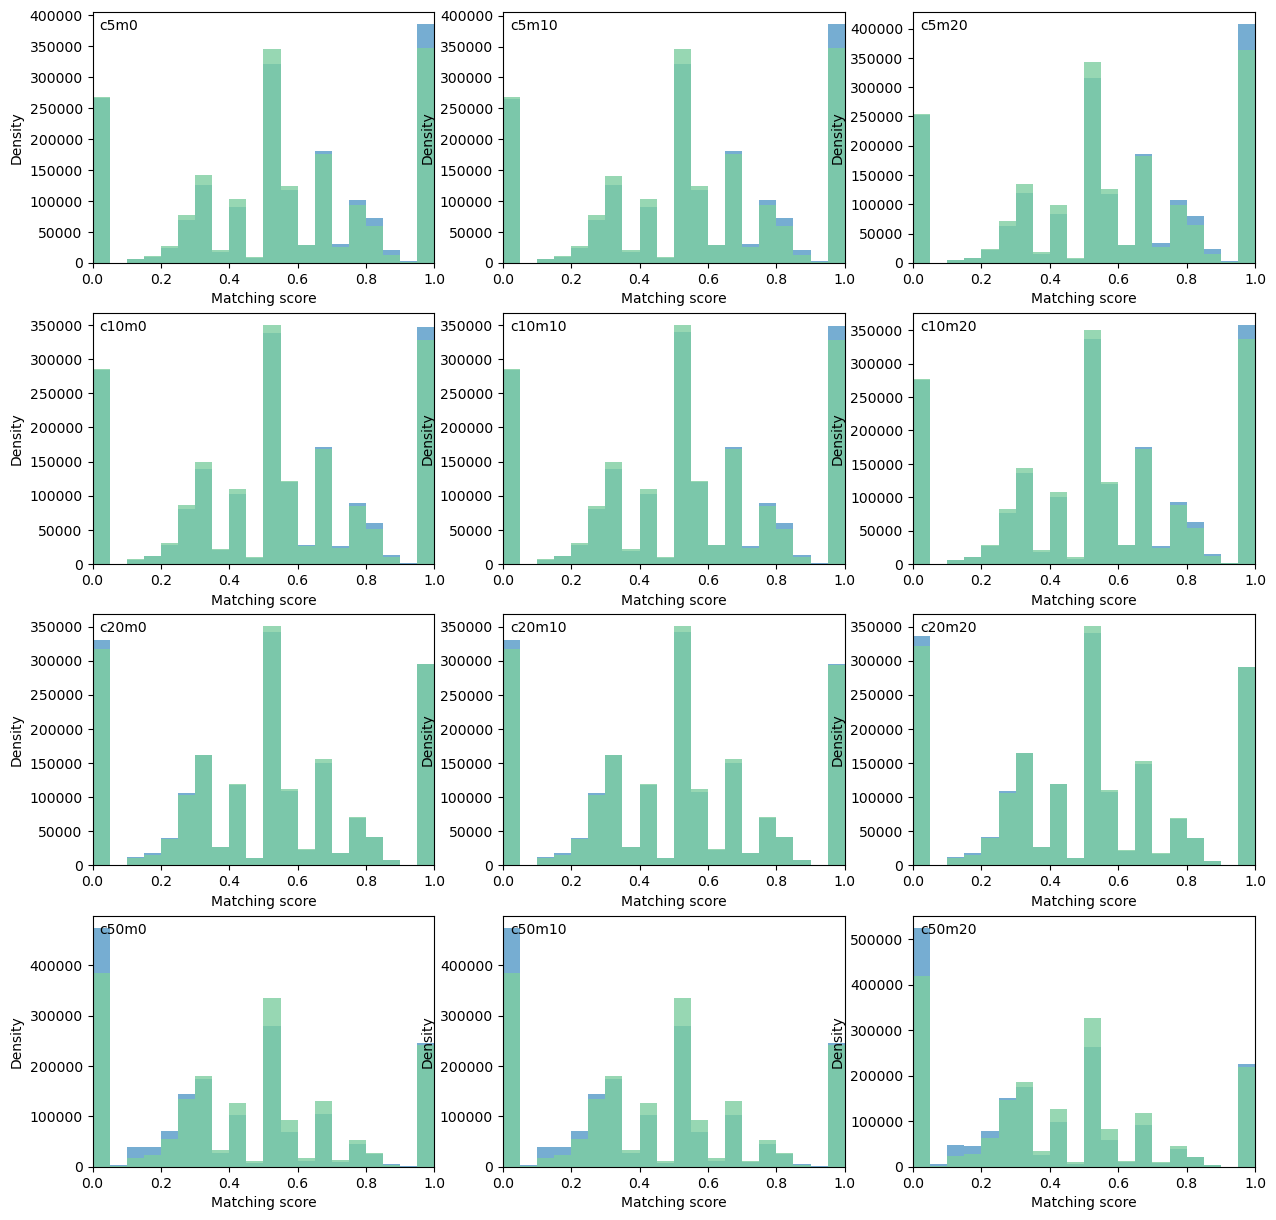

In [151]:
plot_score_distribution(df_score_exp,df_score_random,params)

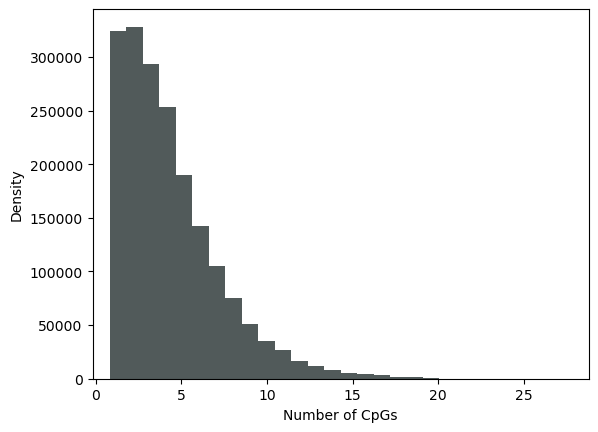

In [152]:
plot_hist_distr_CpGs(df_score_exp)

##### Sliding Windows for NORs

In [153]:
infile = data_path + 'promoter.NOR.HCG.intersect.bed'
df = nome.get_nuc_pos_methylation(infile)

infile = data_path + 'promoter.NOR.HCG.random.intersect.bed'
df_random = nome.get_nuc_pos_methylation(infile)

In [154]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953596,953597,80.0
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953641,953642,100.0
2,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953728,953729,100.0
3,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953753,953754,100.0
4,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953768,953769,100.0


In [155]:
df_random.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953596,953597,33.33
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953641,953642,0.00
2,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953728,953729,0.00
3,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953753,953754,66.67
4,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953768,953769,33.33


In [156]:
df_sliding_windows = make_sliding_windows_file(df, x_y_clash_dict_norm)
df_sliding_windows_random = make_sliding_windows_file(df_random, x_y_clash_dict_norm)

In [157]:
df_sliding_windows.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_174938-86152316,NM_174938,1,1,4,1281,"{16: 0.0, 63: 0.0, 122: 0.0, 125: 0.0}"
1,NM_174938-86152316,NM_174938,1,2,4,1281,"{15: 0.0, 62: 0.0, 121: 0.0, 124: 0.0}"
2,NM_174938-86152316,NM_174938,1,3,4,1281,"{14: 0.0, 61: 0.0, 120: 0.0, 123: 0.0}"
3,NM_174938-86152316,NM_174938,1,4,4,1281,"{13: 0.0, 60: 0.0, 119: 0.0, 122: 0.0}"
4,NM_174938-86152316,NM_174938,1,5,4,1281,"{12: 0.0, 59: 0.0, 118: 0.0, 121: 0.0}"


In [158]:
df_sliding_windows_random.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_174938-86152316,NM_174938,1,1,4,1281,"{16: 0.0, 63: 0.0, 122: 0.0, 125: 66.67}"
1,NM_174938-86152316,NM_174938,1,2,4,1281,"{15: 0.0, 62: 0.0, 121: 0.0, 124: 66.67}"
2,NM_174938-86152316,NM_174938,1,3,4,1281,"{14: 0.0, 61: 0.0, 120: 0.0, 123: 66.67}"
3,NM_174938-86152316,NM_174938,1,4,4,1281,"{13: 0.0, 60: 0.0, 119: 0.0, 122: 66.67}"
4,NM_174938-86152316,NM_174938,1,5,4,1281,"{12: 0.0, 59: 0.0, 118: 0.0, 121: 66.67}"


In [159]:
df_score_exp = calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params)
df_score_random = calc_score_lists(df_sliding_windows_random, x_y_clash_dict_norm, params)

In [160]:
df_score_exp.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_174938-1,NM_174938-86152316,NM_174938,1,1,4,1281,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.00,0.00
1,NM_174938-1,NM_174938-86152316,NM_174938,1,2,4,1281,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,0.50,0.00,0.00,0.00
2,NM_174938-1,NM_174938-86152316,NM_174938,1,3,4,1281,0.75,0.75,0.75,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.25
3,NM_174938-1,NM_174938-86152316,NM_174938,1,4,4,1281,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.25
4,NM_174938-1,NM_174938-86152316,NM_174938,1,5,4,1281,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00


In [161]:
df_score_random.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_174938-1,NM_174938-86152316,NM_174938,1,1,4,1281,0.75,0.75,0.75,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.25
1,NM_174938-1,NM_174938-86152316,NM_174938,1,2,4,1281,0.75,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.25,0.25,0.25
2,NM_174938-1,NM_174938-86152316,NM_174938,1,3,4,1281,0.50,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.25,0.00,0.00,0.00
3,NM_174938-1,NM_174938-86152316,NM_174938,1,4,4,1281,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.50,0.50,0.50
4,NM_174938-1,NM_174938-86152316,NM_174938,1,5,4,1281,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In [162]:
df_pvalues = make_df_p_vals_cohens_d(df_score_exp, df_score_random, params)

/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [163]:
df_pvalues.head()

,nbr_CpGs,parameter,N_EXP,N_RAND,mean_EXP,median_EXP,std_EXP,mean_RAND,median_RAND,std_RAND,cohens_d,is_normal_EXP,is_normal_RAND,pval_ttest,t_stat,pval_ranksums,pval_ks_2samp
0,1,c5m0,146737,146737,0.569488,1.0,0.495148,0.525048,1.0,0.499372,0.089369,0.0,0.0,1.259372e-129,24.206971,1.550113e-96,2.389726e-126
1,1,c5m10,146737,146737,0.570388,1.0,0.495021,0.525825,1.0,0.499333,0.089631,0.0,0.0,2.260252e-130,24.277849,4.648924e-97,4.807780e-127
2,1,c5m20,146737,146737,0.578436,1.0,0.493809,0.538555,1.0,0.498511,0.080378,0.0,0.0,2.610934e-105,21.771637,4.085210e-78,7.901756e-102
3,1,c10m0,146737,146737,0.538174,1.0,0.498541,0.513511,1.0,0.499817,0.049407,0.0,0.0,3.920030e-41,13.382757,5.793507e-31,3.354517e-39
4,1,c10m10,146737,146737,0.538610,1.0,0.498507,0.513947,1.0,0.499805,0.049410,0.0,0.0,3.887977e-41,13.383368,5.793507e-31,3.354517e-39


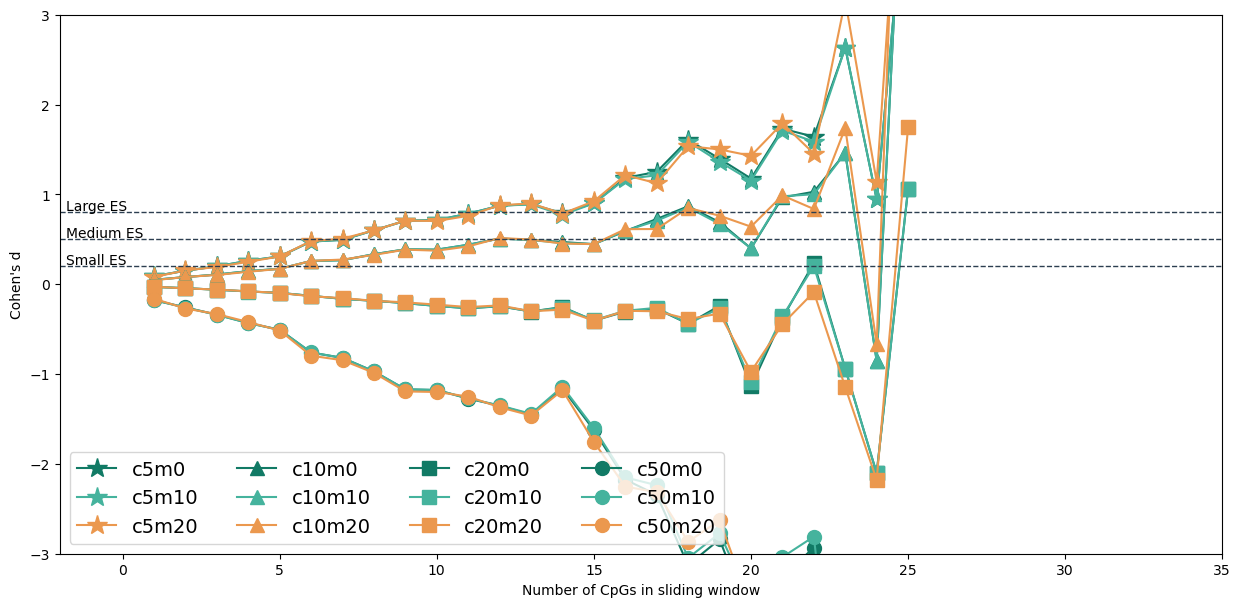

In [164]:
plot_nbr_CpGs_cohensd(df_pvalues, params)

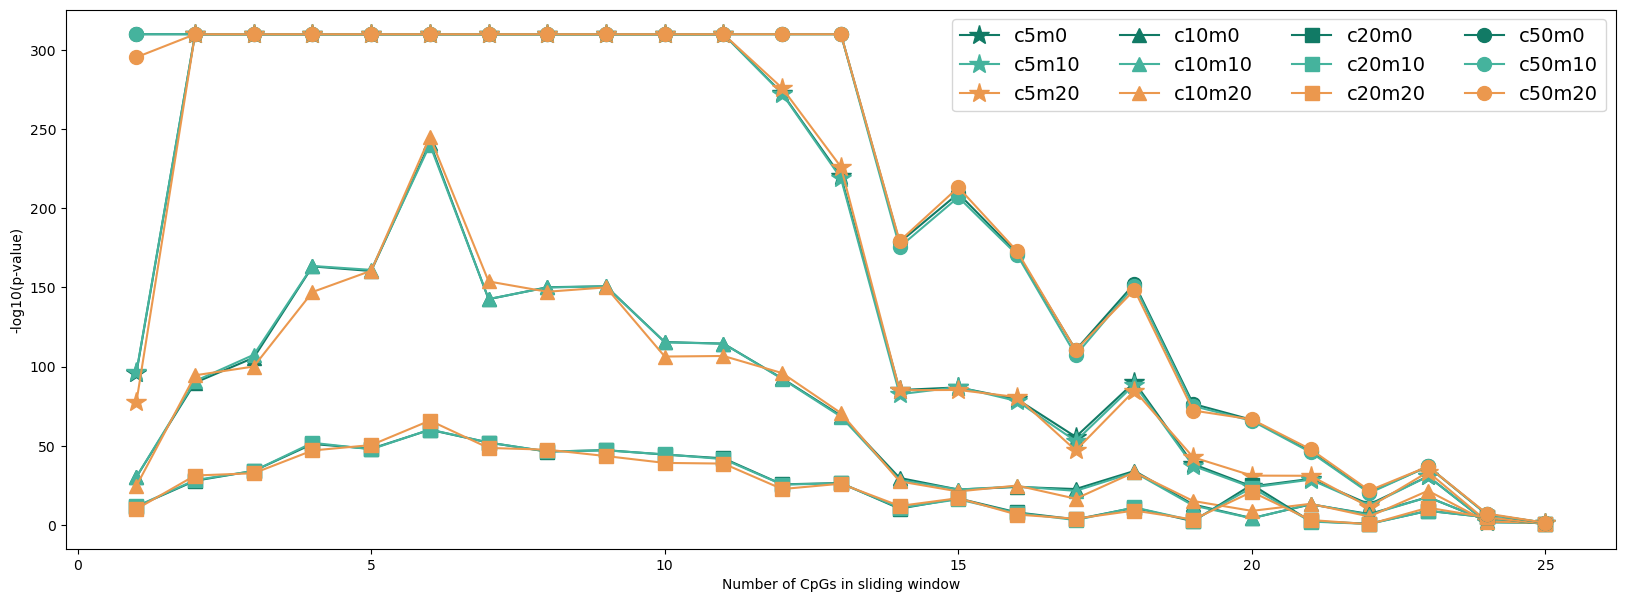

In [165]:
plot_pvals_cohensd(df_pvalues, params)

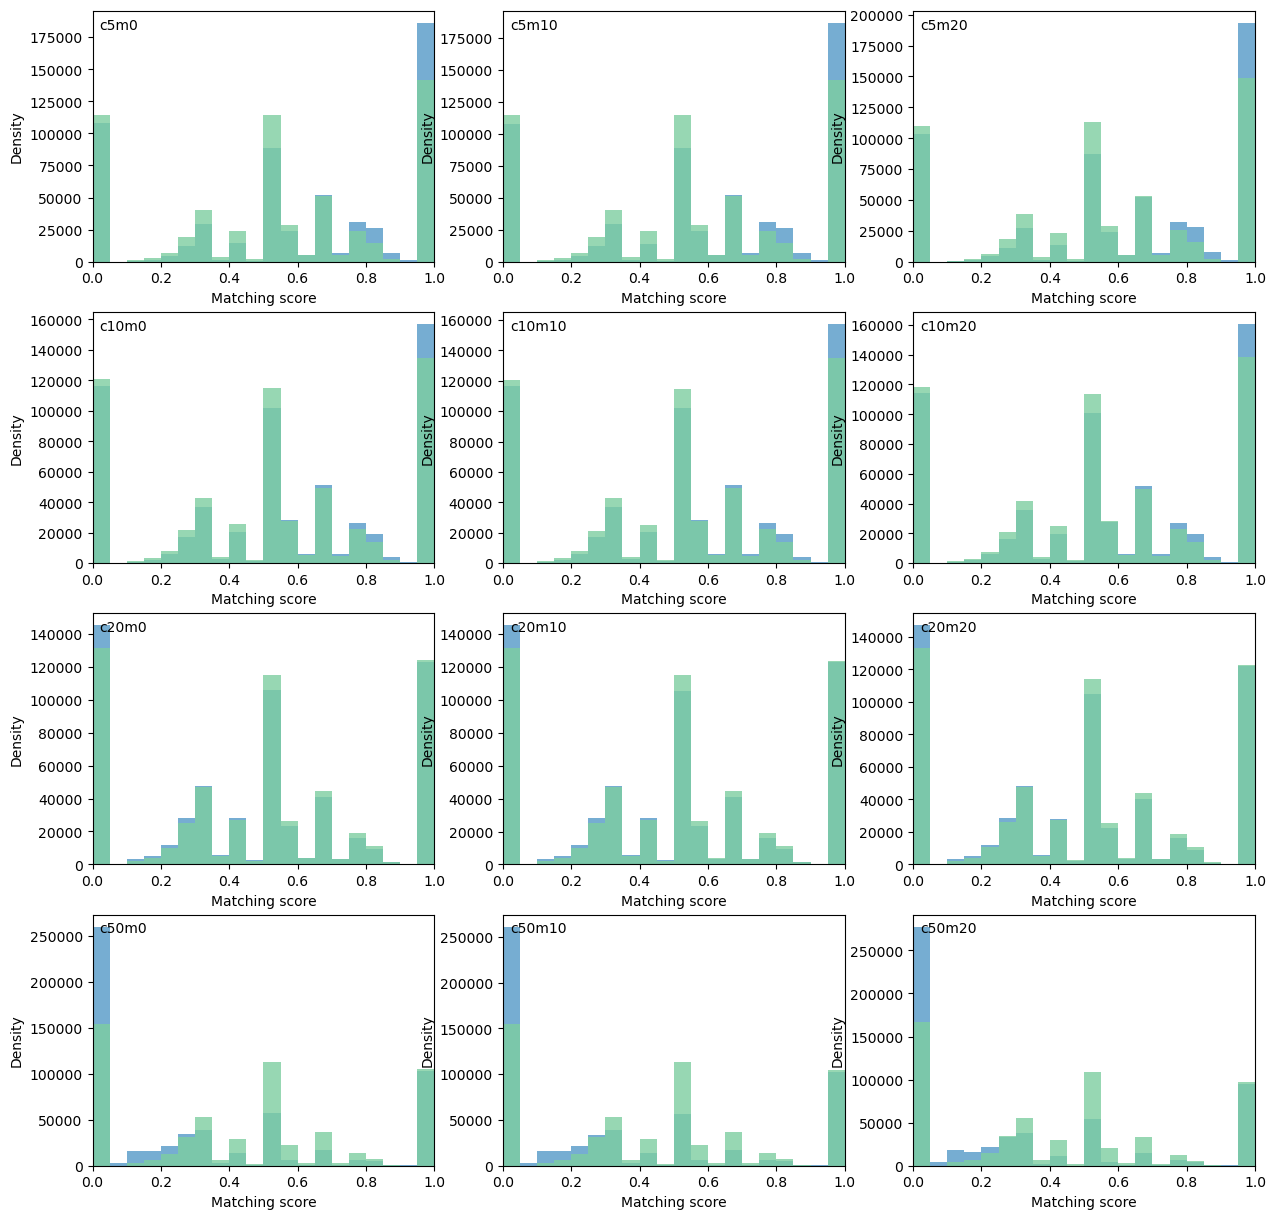

In [166]:
plot_score_distribution(df_score_exp,df_score_random,params)

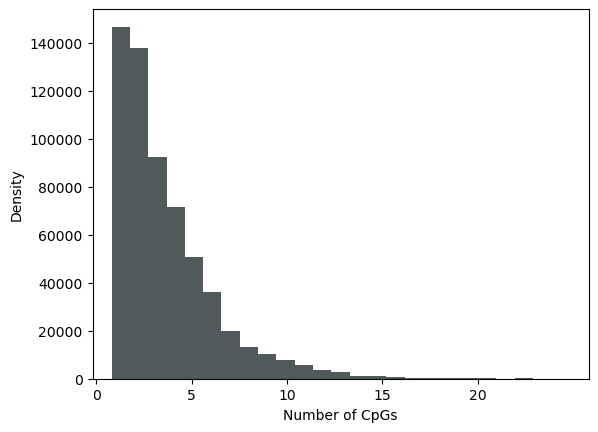

In [167]:
plot_hist_distr_CpGs(df_score_exp)